# Read and plot uncertainty field

In [3]:
import lvpyio as lv
import matplotlib.pyplot as plt
import numpy as np

In [4]:
## read vector set
vector_set = lv.read_set("data\PIV_Velocity_Field_with_Uncertainty.set")    

## check which scalar fields are attached at the first time step to the first frame
# scalar fields are denoted by TS:...
print(vector_set[0][0].components.keys())

## access Uncertainty Vy component from first time step (buffer) and from first frame
uncert_y = vector_set[0][0].components["TS:Uncertainty Vy"]

## data is stored plane-wise, for 2D measurements only one plane exists
uncert_y_unscaled = uncert_y[0]

## for a proper scaling in m/s access the scaling of the uncertainty component and apply it
uncert_y_scaled = uncert_y_unscaled*uncert_y.scale.slope + uncert_y.scale.offset

## define x & y coordinates
# get necessary scales
scales = vector_set[0][0].scales # get mm/px scales
grid = vector_set[0][0].grid # get vector grid sizes in pixels

vector_set.close() # close set, when all infos are retrieved

dict_keys(['U0', 'V0', 'ACTIVE_CHOICE', 'ENABLED', 'MASK', 'TS:Correlation value', 'TS:IntWin angle', 'TS:IntWin factor X', 'TS:IntWin factor Y', 'TS:Peak ratio', 'TS:Uncertainty V', 'TS:Uncertainty Vx', 'TS:Uncertainty Vy'])


In [5]:
# define vector grid
# Note: in DaVis x represents the column index
# and y represents the row index
x = np.arange(0,np.size(uncert_y,1),1)
y = np.arange(0,np.size(uncert_y,0),1)
              
# calculate pixel positions of vector grid
x = x*grid.x
y = y*grid.y

# convert vector pixel positions in mm
x = x*scales.x.slope + scales.x.offset
y = y*scales.y.slope + scales.y.offset

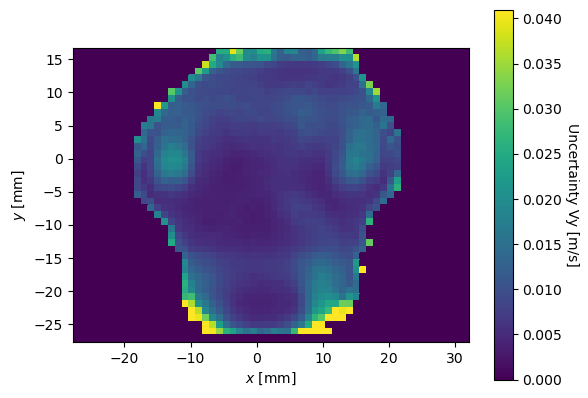

In [6]:
## create meshgrid for plotting
X, Y = np.meshgrid(x,y)

## Plot uncertainty field
plt.figure()
plt.pcolor(X,Y,uncert_y_scaled)
plt.gca().set_aspect('equal')
plt.xlabel('$x$ [mm]'), plt.ylabel('$y$ [mm]')
plt.clim([0, 0.25*np.max(uncert_y_scaled)])
cb = plt.colorbar()
cb.set_label(uncert_y.scale.description+' ['+uncert_y.scale.unit+']', rotation=270, verticalalignment='baseline')